# Hello Capstone Project Course!

This notebook will be mainly used for the capstone project of the coursera Data Science certificate 

# The Problem

Our goal is to develop a model that can predict whether a client is prone to heart disease or not. For that, we have gathered some data based on various statistics and measurements of patients with known heart condition, and based on that information, we are going to train an SVM classifier in order to be able to tell if a patient has a heart disease or not. 

# The Data

There are medical measures and demographics of 303 patients. There are 13 independent attributes and the class, or the dependent variable, is the 'target' attibute of the dataset. These attributes are described as 
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defec

The class of the dataset, consist of 0, in case the heart of the patient is healty, or 1 of the patient suffers of a heart disease.

# The process

First, lets insert the dataset in the notebook.

In [43]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3




body = client_22fb5099a3be469aaac5acf0e73e7b0c.get_object(Bucket='courseracapstone-donotdelete-pr-putkuk07ddhk3c',Key='heart.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Secondly, lets import the necessary libraries and check if the attributes are of useful type.

In [17]:
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [18]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

As every attribute has numerical value, we can use it in the SVM algorithm. Now lets explore if there is any missing value in the dataset.

In [29]:
df.isnull().values.any()

False

There are no missing values therefore we can proceed to split the dataset to its independent and dependent variables.

In [19]:
feature_df = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang','oldpeak','slope','ca','thal']]
X = np.asarray(feature_df)
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [20]:
df['target'] = df['target'].astype('int')
y = np.asarray(df['target'])
y [0:5]

array([1, 1, 1, 1, 1])

Now it is time to split the sets in test and train set. We choose to use 80% of the records to train the model and then the remaining 20% to test the accuracy of the model. That said, there are used 242 records to train and 61 records to test the SVM model that will be created.

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


Scikit-Learn contains the svm library, which contains built-in classes for different SVM algorithms. Since we are going to perform a classification task, we will use the support vector classifier class, which is written as SVC in the Scikit-Learn's svm library. This class takes one parameter, which is the kernel type. In the case of a simple SVM we simply set this parameter as "linear" since simple SVMs can only classify linearly separable data. 

In [22]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

The fit method of SVC class is called to train the algorithm on the training data, which is passed as a parameter to the fit method. To make predictions, the predict method of the SVC class is used.

In [23]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 1, 0, 1, 1])

Confusion matrix, precision, recall, and F1 measures are the most commonly used metrics for classification tasks. Scikit-Learn's metrics library contains the classification_report and confusion_matrix methods, which can be readily used to find out the values for these important metrics.

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.84      0.84      0.84        31

   micro avg       0.84      0.84      0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion matrix, without normalization
[[25  5]
 [ 5 26]]


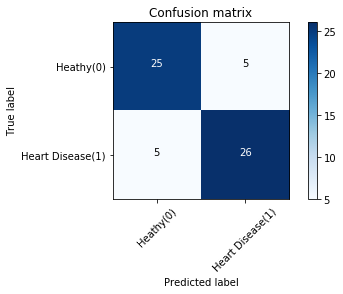

In [30]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Heathy(0)','Heart Disease(1)'],normalize= False,  title='Confusion matrix')

Finally we use f1_score and jaccard index in order to quantify the accuracy of the built model. 

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.8360655737704918

In [28]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8360655737704918

The SVM model was able to successfully predict 83% of the test set. Actually it correctly predicted 25 healthy patients out of the 30 and 25 patients suffering from heart disease out of the 31. That is a satisfying accuracy and the model can be used to help quickly assume the condondition of a patient given those medical measurements. Of course because this is a medical condition, a doctor should always supervise and consult the patient.